In [0]:
!pip install graphviz
!apt-get install graphviz
!pip install -q pydot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [0]:
!apt-get autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libnvidia-common-410
0 upgraded, 0 newly installed, 1 to remove and 6 not upgraded.
After this operation, 33.8 kB disk space will be freed.
(Reading database ... 130911 files and directories currently installed.)
Removing libnvidia-common-410 (410.104-0ubuntu1) ...


In [0]:
print("*************** GPU info ***************")
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information
print("*************** CPU info ***************")
!cat /proc/cpuinfo
print("*************** Memory info ***************")
!cat /proc/meminfo

*************** GPU info ***************
Model: 		 Tesla K80
IRQ:   		 33
GPU UUID: 	 GPU-46163f9d-aa29-6d72-42e5-69f5609df0ad
Video BIOS: 	 80.21.25.00.02
Bus Type: 	 PCI
DMA Size: 	 40 bits
DMA Mask: 	 0xffffffffff
Bus Location: 	 0000:00:04.0
Device Minor: 	 0
Blacklisted:	 No
*************** CPU info ***************
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_s

In [0]:
from google.colab import files
uploaded = files.upload()
!ls

Saving dataset.csv to dataset.csv


In [0]:
!pip install tldextract

In [0]:
import os
import sys
import re
import matplotlib
import pandas as pd
import numpy as np
from os.path import splitext
import ipaddress as ip
import tldextract
#import whois
import datetime
from urllib.parse import urlparse

In [0]:
Suspicious_TLD=['zip','cricket','link','work','party','gq','kim','country','science','tk']
Suspicious_Domain=['luckytime.co.kr','mattfoll.eu.interia.pl','trafficholder.com','dl.baixaki.com.br','bembed.redtube.comr','tags.expo9.exponential.com','deepspacer.com','funad.co.kr','trafficconverter.biz']

In [0]:
df = pd.read_csv("dataset.csv")#urldata (2)
#df=df.sample(frac=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,URL,Lable
0,http://pager12.tripod.com/page/,1
1,http://www.fpif.org/,0
2,http://www.mcfcforum.com/,0
3,http://elmwoodinn.com/,0
4,http://paypal.com.webbapps-limited-resolve-acc...,1


In [0]:
df.groupby(df['Lable']).size()

Lable
0    3494
1    3536
dtype: int64

In [0]:
df1=df.sample(frac=0.05, random_state=990)

In [0]:
len(df1)

352

In [0]:
df1.groupby(df['Lable']).size()

Lable
0    203
1    149
dtype: int64

In [0]:
df1['label'].loc[df1['Lable'] == 'good'] = 0
df1['label'].loc[df1['Lable'] == 'bad'] = 1

In [0]:
df1.head()

,url,label
1882,movies.msn.com/movies/movie/jacob-two-two-anim...,0
120494,boinobrecarnes.com.br/wp-admin/user/,1
388855,thecanadianencyclopedia.com/index.cfm?PgNm=TCE...,0
364603,yellowpages.ca/bus/Quebec/Montreal/Centre-Hosp...,0
396796,facebook.com/pages/Nikki-Yanofsky/335188996411,0


In [0]:
def countdots(url):  
    return url.count('.')
def countdelim(url):
    count = 0
    delim=[';','_','?','=','&']
    for each in url:
        if each in delim:
            count = count + 1
    
    return count
import ipaddress as ip #works only in python 3

def isip(uri):
    try:
        if ip.ip_address(uri):
            return 1
    except:
        return 0
def isPresentHyphen(url):
    return url.count('-')
def isPresentAt(url):
    return url.count('@')
def isPresentDSlash(url):
    return url.count('//')
def countSubDir(url):
    return url.count('/')
def get_ext(url):
    """Return the filename extension from url, or ''."""
    
    root, ext = splitext(url)
    return ext
def countSubDomain(subdomain):
    if not subdomain:
        return 0
    else:
        return len(subdomain.split('.'))
def countQueries(query):
    if not query:
        return 0
    else:
        return len(query.split('&'))


In [0]:
from urllib.parse import urlparse
import tldextract
def getFeatures(url, label): 
    result = []
    url = str(url)
    
    #add the url to feature set
    result.append(url)
    
    #parse the URL and extract the domain information
    path = urlparse(url)
    ext = tldextract.extract(url)
    
    #counting number of dots in subdomain    
    result.append(countdots(ext.subdomain))
    
    #checking hyphen in domain   
    result.append(isPresentHyphen(path.netloc))
    
    #length of URL    
    result.append(len(url))
    
    #checking @ in the url    
    result.append(isPresentAt(path.netloc))
    
    #checking presence of double slash    
    result.append(isPresentDSlash(path.path))
    
    #Count number of subdir    
    result.append(countSubDir(path.path))
    
    #number of sub domain    
    result.append(countSubDomain(ext.subdomain))
    
    #length of domain name    
    result.append(len(path.netloc))
    
    #count number of queries    
    result.append(len(path.query))
    
    #Adding domain information
    
    #if IP address is being used as a URL     
    result.append(isip(ext.domain))
    
    #presence of Suspicious_TLD
    result.append(1 if ext.suffix in Suspicious_TLD else 0)
    
    #presence of suspicious domain
    result.append(1 if '.'.join(ext[1:]) in Suspicious_Domain else 0 )
    result.append(str(label))
    return result

In [0]:
featureSet = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','presence of Suspicious_TLD',\
'presence of suspicious domain','label'))
 

In [0]:
len(df)

7030

In [0]:
df1=df1.sample(frac=1).reset_index(drop=True)

In [0]:
for i in range(len(df)):
    features = getFeatures(df["URL"].loc[i], df["Lable"].loc[i])    
    featureSet.loc[i] = features 

In [0]:
featureSet.head()

,url,no of dots,presence of hyphen,len of url,presence of at,presence of double slash,no of subdir,no of subdomain,len of domain,no of queries,is IP,presence of Suspicious_TLD,presence of suspicious domain,label
0,http://pager12.tripod.com/page/,0,0,31,0,0,2,1,18,0,0,0,0,1
1,http://www.fpif.org/,0,0,20,0,0,1,1,12,0,0,0,0,0
2,http://www.mcfcforum.com/,0,0,25,0,0,1,1,17,0,0,0,0,0
3,http://elmwoodinn.com/,0,0,22,0,0,1,0,14,0,0,0,0,0
4,http://paypal.com.webbapps-limited-resolve-acc...,4,4,115,0,0,4,5,85,0,0,0,0,1


In [0]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.3)


In [0]:
import sklearn.ensemble as ek
#from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [0]:
X = featureSet.drop(['url','label'],axis=1).values
y = featureSet['label'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [0]:
from math import sin, cos, sqrt, atan2, radians
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [0]:
gbm = lgb.LGBMRegressor(objective = 'regression',  
                            max_depth = 3,
                            colsample_bytre = 0.8,
                            subsample = 0.8, 
                            learning_rate = 0.1,
                            n_estimators = 300)

In [0]:
gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse', early_stopping_rounds=5)

[1]	valid_0's rmse: 0.471125	valid_0's l2: 0.221958
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's rmse: 0.446594	valid_0's l2: 0.199446
[3]	valid_0's rmse: 0.425342	valid_0's l2: 0.180916
[4]	valid_0's rmse: 0.407641	valid_0's l2: 0.166171
[5]	valid_0's rmse: 0.392738	valid_0's l2: 0.154243
[6]	valid_0's rmse: 0.379649	valid_0's l2: 0.144134
[7]	valid_0's rmse: 0.368938	valid_0's l2: 0.136115
[8]	valid_0's rmse: 0.35952	valid_0's l2: 0.129255
[9]	valid_0's rmse: 0.350752	valid_0's l2: 0.123027
[10]	valid_0's rmse: 0.344357	valid_0's l2: 0.118582
[11]	valid_0's rmse: 0.338443	valid_0's l2: 0.114544
[12]	valid_0's rmse: 0.332473	valid_0's l2: 0.110538
[13]	valid_0's rmse: 0.327811	valid_0's l2: 0.10746
[14]	valid_0's rmse: 0.324275	valid_0's l2: 0.105154
[15]	valid_0's rmse: 0.321091	valid_0's l2: 0.1031
[16]	valid_0's rmse: 0.31804	valid_0's l2: 0.101149
[17]	valid_0's rmse: 0.315815	valid_0's l2: 0.0997389
[18]	valid_0's rmse: 0.313639	valid_0's l2: 0.09836

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytre=0.8,
       colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
       max_depth=3, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=300, n_jobs=-1, num_leaves=31,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=0.8,
       subsample_for_bin=200000, subsample_freq=0)

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
GBoost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=5,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [0]:
preds_GBoost=GBoost.predict(X_test)

In [0]:
score_GBoost=np.round(np.clip(preds_GBoost, 0,1)).astype('int')

In [0]:
mt_GBoost = confusion_matrix(y_test.astype('int'), score_GBoost)
mt_GBoost

array([[617,  81],
       [ 63, 645]])

In [0]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [0]:
preds_model_xgb=model_xgb.predict(X_test)

In [0]:
score_xgb=np.round(np.clip(preds_model_xgb, 0,1)).astype('int')
mt_xgb = confusion_matrix(y_test.astype('int'), score_xgb)
mt_xgb

array([[616,  82],
       [ 65, 643]])

In [0]:
model_lgb.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.05, max_bin=55,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=6, min_split_gain=0.0, min_sum_hessian_in_leaf=11,
       n_estimators=720, n_jobs=-1, num_leaves=5, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
preds_model_lgb=model_lgb.predict(X_test)

In [0]:
score_lgb=np.round(np.clip(preds_model_lgb, 0,1)).astype('int')
mt_lgb = confusion_matrix(y_test.astype('int'), score_lgb)
mt_lgb

array([[606,  92],
       [ 93, 615]])

In [0]:
!pip install catboost

    100% |████████████████████████████████| 55.5MB 986kB/s 


In [0]:
from catboost import CatBoostRegressor
model_cat = CatBoostRegressor(iterations=200, learning_rate=0.3, depth=4)

In [0]:
model_cat.fit(X_train, y_train)

0:	learn: 0.5515396	total: 51.3ms	remaining: 10.2s
1:	learn: 0.4568168	total: 55.3ms	remaining: 5.47s
2:	learn: 0.3939048	total: 58.8ms	remaining: 3.86s
3:	learn: 0.3584810	total: 63ms	remaining: 3.09s
4:	learn: 0.3360767	total: 66.7ms	remaining: 2.6s
5:	learn: 0.3231794	total: 70.2ms	remaining: 2.27s
6:	learn: 0.3162773	total: 74ms	remaining: 2.04s
7:	learn: 0.3100457	total: 77.6ms	remaining: 1.86s
8:	learn: 0.3059209	total: 81.1ms	remaining: 1.72s
9:	learn: 0.3029929	total: 84.8ms	remaining: 1.61s
10:	learn: 0.3013208	total: 88.3ms	remaining: 1.52s
11:	learn: 0.2989577	total: 91.9ms	remaining: 1.44s
12:	learn: 0.2981698	total: 95.2ms	remaining: 1.37s
13:	learn: 0.2949047	total: 98.9ms	remaining: 1.31s
14:	learn: 0.2942013	total: 102ms	remaining: 1.26s
15:	learn: 0.2926849	total: 106ms	remaining: 1.22s
16:	learn: 0.2913815	total: 109ms	remaining: 1.18s
17:	learn: 0.2902145	total: 113ms	remaining: 1.14s
18:	learn: 0.2898786	total: 116ms	remaining: 1.11s
19:	learn: 0.2895591	total: 120m

In [0]:
preds_model_cat=model_cat.predict(X_test)

In [0]:
score_cat=np.round(np.clip(preds_model_cat, 0,1)).astype('int')
mt_cat = confusion_matrix(y_test.astype('int'), score_cat)
mt_cat

array([[620,  78],
       [ 60, 648]])

In [0]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [0]:
averaged_models = AveragingModels(models = (GBoost, model_xgb, model_lgb, model_cat))

averaged_models.fit(X_train, y_train)

0:	learn: 0.5515396	total: 4.61ms	remaining: 917ms
1:	learn: 0.4568168	total: 8.9ms	remaining: 882ms
2:	learn: 0.3939048	total: 12.9ms	remaining: 847ms
3:	learn: 0.3584810	total: 16.9ms	remaining: 827ms
4:	learn: 0.3360767	total: 21ms	remaining: 820ms
5:	learn: 0.3231794	total: 25ms	remaining: 808ms
6:	learn: 0.3162773	total: 29.1ms	remaining: 802ms
7:	learn: 0.3100457	total: 33.1ms	remaining: 794ms
8:	learn: 0.3059209	total: 36.9ms	remaining: 783ms
9:	learn: 0.3029929	total: 40.8ms	remaining: 774ms
10:	learn: 0.3013208	total: 44.7ms	remaining: 768ms
11:	learn: 0.2989577	total: 48.7ms	remaining: 763ms
12:	learn: 0.2981698	total: 53.1ms	remaining: 764ms
13:	learn: 0.2949047	total: 57.1ms	remaining: 758ms
14:	learn: 0.2942013	total: 60.9ms	remaining: 752ms
15:	learn: 0.2926849	total: 64.9ms	remaining: 746ms
16:	learn: 0.2913815	total: 68.9ms	remaining: 742ms
17:	learn: 0.2902145	total: 72.9ms	remaining: 737ms
18:	learn: 0.2898786	total: 76.9ms	remaining: 732ms
19:	learn: 0.2895591	total:

AveragingModels(models=(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_...ample_for_bin=200000, subsample_freq=0), <catboost.core.CatBoostRegressor object at 0x7f6282603e48>))

In [0]:
preds_averaged_models=averaged_models.predict(X_test)

In [0]:
#len(preds_averaged_models)
score=np.round(np.clip(preds_averaged_models, 0,1)).astype('int')

In [0]:
mt = confusion_matrix(y_test.astype('int'), score)

In [0]:
mt

array([[618,  80],
       [ 76, 632]])

My 0.846411065416969
GBoost 0.8541825281242198
XGB 0.8517028742421711
LGB 0.8217548544055994
CAT_Boost 0.8595953906147726


Text(0.5, 0, 'Средняя точность')

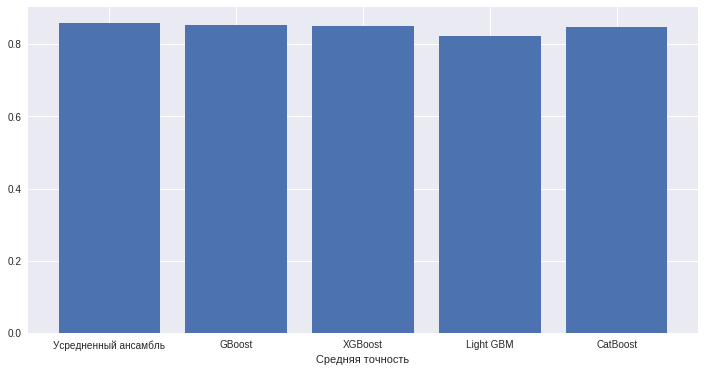

In [0]:
from sklearn.metrics import average_precision_score
average_precision_my = average_precision_score(y_test.astype('int'), score)
print ('My', average_precision_my)
average_precision_GBoost = average_precision_score(y_test.astype('int'), score_GBoost)
print ('GBoost', average_precision_GBoost)
average_precision_xgb = average_precision_score(y_test.astype('int'), score_xgb)
print ('XGB', average_precision_xgb)
average_precision_lgb = average_precision_score(y_test.astype('int'), score_lgb)
print ('LGB', average_precision_lgb)
average_precision_cat = average_precision_score(y_test.astype('int'), score_cat)
print ('CAT_Boost', average_precision_cat)
results={'Усредненный ансамбль':average_precision_cat,
 'GBoost':average_precision_GBoost,
 'XGBoost':average_precision_xgb,
 'Light GBM':average_precision_lgb,
'CatBoost': average_precision_my}
plt.figure(figsize=(12, 6))
plt.bar(range(len(results)), list(results.values()))
plt.xticks(range(len(results)), list(results.keys()))
plt.xlabel('Средняя точность')
#plt.ylabel('Модели')

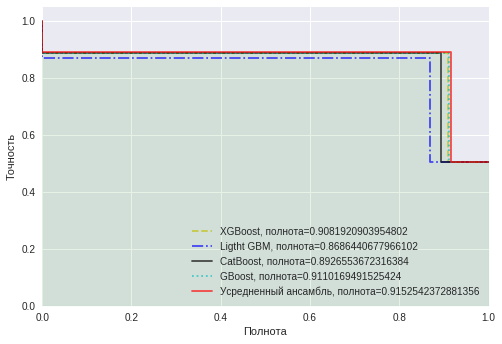

In [0]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score
precision, recall, _ = precision_recall_curve(y_test.astype('int'), score)
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test.astype('int'), score_lgb)
precision_cat, recall_cat, _ = precision_recall_curve(y_test.astype('int'), score_cat)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test.astype('int'), score_xgb)
precision_GBoost, recall_GBoost, _ = precision_recall_curve(y_test.astype('int'), score_GBoost)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})


plt.step(recall_xgb, precision_xgb, color='y', alpha=0.7,
         where='post', linestyle="--", label="XGBoost, полнота="+str(recall_xgb[1]))
#plt.fill_between(recall_lgb, precision_lgb, alpha=0.1, color='b', **step_kwargs)
plt.step(recall_lgb, precision_lgb, color='b', alpha=0.7,
         where='post', linestyle="-.", label="Ligtht GBM, полнота="+str(recall_lgb[1]))
#plt.fill_between(recall_lgb, precision_lgb, alpha=0.1, color='b', **step_kwargs)
plt.step(recall, precision, color='k', alpha=0.7,
         where='post', linestyle="-",  label="CatBoost, полнота="+str(recall[1]))
#plt.fill_between(recall, precision, alpha=0.1, color='r', **step_kwargs)
plt.step(recall_GBoost, precision_GBoost, color='c', alpha=0.7,
         where='post', linestyle=":", label="GBoost, полнота="+str(recall_GBoost[1]))




plt.step(recall_cat, precision_cat, color='r', alpha=0.7,
         where='post',label="Усредненный ансамбль, полнота="+str(recall_cat[1]))#+str(precision_cat)
plt.fill_between(recall_cat, precision_cat, alpha=0.1, color='g', **step_kwargs)
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
#plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          #average_precision_my))

plt.legend(loc=4)

In [0]:
precision
recall

array([1.        , 0.89265537, 0.        ])

In [0]:
tn, fp, fn, tp = mt.ravel()
tn, fp, fn, tp

(612, 64, 66, 664)

In [0]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(score, y_test.astype('int'), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.91      0.90      0.90       678
     class 1       0.91      0.91      0.91       728

   micro avg       0.91      0.91      0.91      1406
   macro avg       0.91      0.91      0.91      1406
weighted avg       0.91      0.91      0.91      1406



In [0]:
from sklearn.metrics import hamming_loss
hamming_loss(score, y_test.astype('int'))

0.09246088193456614

In [0]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(score, y_test.astype('int'))

0.8148286275908594

In [0]:


import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
exp_series = pd.Series(y_test.astype('int'))
pred_series = pd.Series(score)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,618,80,698
1,76,632,708
All,694,712,1406


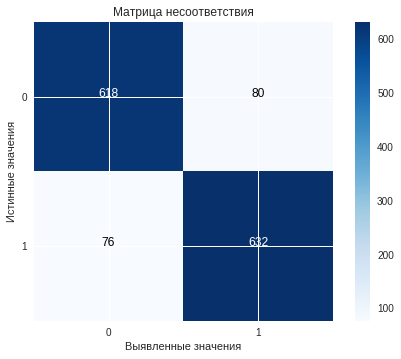

In [0]:
plt.imshow(mt,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Матрица несоответствия')
plt.xlabel('Выявленные значения')
plt.ylabel('Истинные значения')
tick_marks = np.arange(len(set(y.astype('int')))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = mt.max() / 2.
for i,j in itertools.product(range(mt.shape[0]),range(mt.shape[1])):
    plt.text(j,i,format(mt[i,j],'d'),horizontalalignment='center',color='white' if mt[i,j] >thresh else 'black')
plt.show()

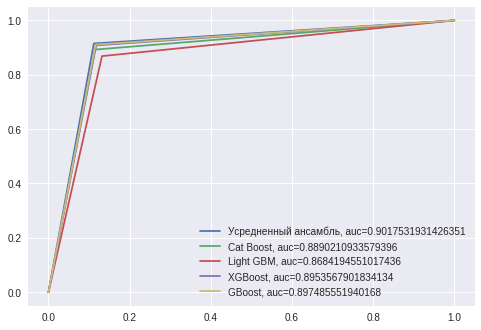

In [0]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
fpr_cat, tpr_cat, _ = metrics.roc_curve(y_test.astype('int'), score_cat)
auc_cat = metrics.roc_auc_score(y_test.astype('int'), score_cat)
plt.plot(fpr_cat,tpr_cat,label="Усредненный ансамбль, auc="+str(auc_cat))
fpr, tpr, _ = metrics.roc_curve(y_test.astype('int'), score)
auc = metrics.roc_auc_score(y_test.astype('int'), score)
plt.plot(fpr,tpr,label="Cat Boost, auc="+str(auc))

fpr_lgb, tpr_lgb, _ = metrics.roc_curve(y_test.astype('int'), score_lgb)
auc_lgb = metrics.roc_auc_score(y_test.astype('int'), score_lgb)
plt.plot(fpr_lgb,tpr_lgb,label="Light GBM, auc="+str(auc_lgb))
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test.astype('int'), score_xgb)
auc_xgb = metrics.roc_auc_score(y_test.astype('int'), score_xgb)
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc="+str(auc_xgb))
fpr_g, tpr_g, _ = metrics.roc_curve(y_test.astype('int'), score_GBoost)
auc_g = metrics.roc_auc_score(y_test.astype('int'), score_GBoost)
plt.plot(fpr_g,tpr_g,label="GBoost, auc="+str(auc_g))
plt.legend(loc=4)
plt.show()

In [0]:
from mlxtend.evaluate import lift_score
lift_score(y.astype('int'), score)

5.283823273410935

In [0]:
mt


array([[20160,    54],
       [ 3588,   742]])

In [0]:
len(y)

1000

In [0]:

# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
precision, recall, thresholds = precision_recall_curve(y.astype('int'), score)
# calculate F1 score
f1 = f1_score(testy, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

ValueError: ignored

In [0]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time, pickle
import xgboost as xgb
import seaborn as sns

In [0]:
train = pd.read_csv('Train (2).csv')
test = pd.read_csv('Test (2).csv')

train = train.replace(np.nan, 0)
test = test.replace(np.nan, 0)

In [0]:
COLUMNS = ['street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon', 'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13']

In [0]:
y = train['price'].values
X = train[COLUMNS].values
Xt = test[COLUMNS].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
import sklearn.ensemble
mdl = sklearn.ensemble.RandomForestRegressor()

mdl.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
preds = mdl.predict(X_test)


In [0]:
sklearn.metrics.mean_absolute_error(y_true=y_test, y_pred=preds)

1772125.8307864356

**Bayesian Ridge Regression**

In [0]:
from sklearn import linear_model

In [0]:
reg = linear_model.BayesianRidge()

In [0]:
reg.fit(X_train, y_train)

In [0]:
preds2=reg.predict(X_test)

In [0]:
sklearn.metrics.mean_absolute_error(y_true=y_test, y_pred=preds2)

1962019.1965382786

In [0]:
!pip install lightgbm

    100% |████████████████████████████████| 737kB 5.8MB/s 


In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    #mae=sklearn.metrics.mean_absolute_error(X_train, y_train)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
lasso.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [0]:
preds_lasso=lasso.predict(X_test)

In [0]:
sklearn.metrics.mean_absolute_error(y_true=y_test, y_pred=preds_lasso)

1962005.580727992

In [0]:
ENet.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False))])

In [0]:
preds_ENet=ENet.predict(X_test)

In [0]:
sklearn.metrics.mean_absolute_error(y_true=y_test, y_pred=preds_ENet)

1961966.9720420456

In [0]:
GBoost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [0]:
preds_GBoost=GBoost.predict(X_test)

In [0]:
import sklearn
sklearn.metrics.mean_absolute_error(y_true=y_test, y_pred=preds_GBoost)

1573740.7422462571

In [0]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [0]:
preds_model_xgbt=model_xgb.predict(X_test)

In [0]:
sklearn.metrics.mean_absolute_error(y_true=y_test, y_pred=preds_model_xgbt)

1476823.146203125

In [0]:
model_lgb.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       learning_rate=0.05, max_bin=55, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_data_in_leaf=6, min_split_gain=0.0,
       min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
       num_leaves=5, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [0]:
preds_model_lgb=model_lgb.predict(X_test)

In [0]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [0]:
averaged_models = AveragingModels(models = (ENet, GBoost, model_lgb, lasso))

averaged_models.fit(X_train, y_train)

AveragingModels(models=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False...ve=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])))

In [0]:
preds_averaged_models=averaged_models.predict(X_test)

In [0]:
sklearn.metrics.mean_absolute_error(y_true=y_test, y_pred=preds_averaged_models)

1895808.8267175274

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
#'drive/Colab Notebooks/'

In [0]:
preds = averaged_models.predict(Xt)

test['price'] = preds

test[['id', 'price']].to_csv('drive/Colab Notebooks/sub10.csv', index=False)